### Installing PPScore

In [ ]:
!pip install ppscore

## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import IsolationForest
import ppscore as pps

In [ ]:
data=pd.read_csv("/content/adult_with_headers.csv")

# EDA

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Visualizations

<Axes: xlabel='sex'>

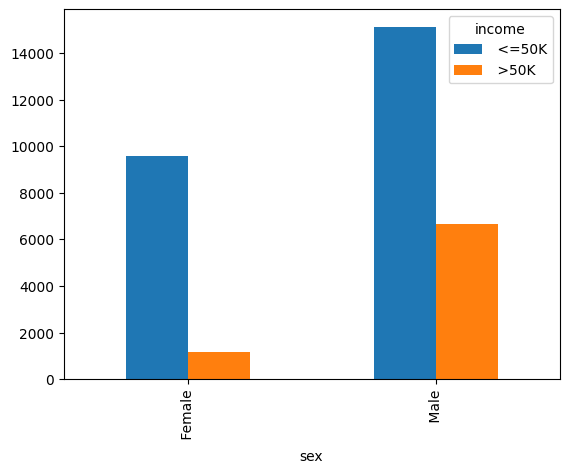

In [ ]:
pd.crosstab(data.sex,data.income).plot(kind="bar")

<Axes: xlabel='workclass'>

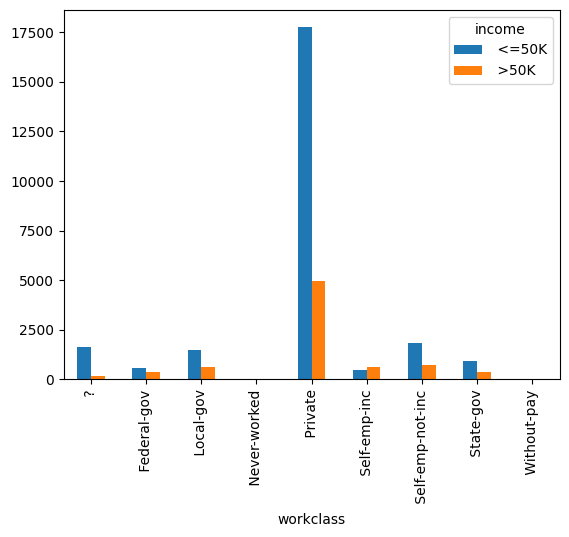

In [ ]:
pd.crosstab(data.workclass,data.income).plot(kind="bar")

<Axes: ylabel='workclass'>

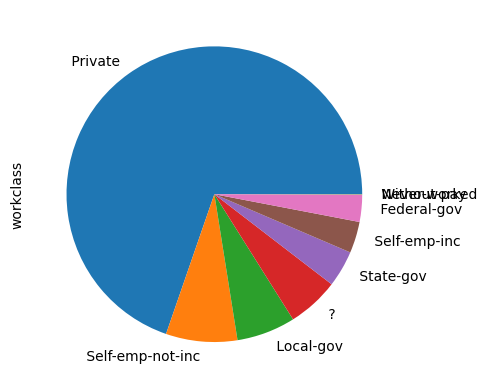

In [ ]:
data["workclass"].value_counts().plot(kind="pie")

There is a misplaced category in the workclass column with "?".We need to replace this with valid value.So Iam replacing with mode of the class.

In [ ]:
data["workclass"]=data["workclass"].replace({data["workclass"].unique()[5]:data["workclass"].mode()[0]})

<Axes: ylabel='education'>

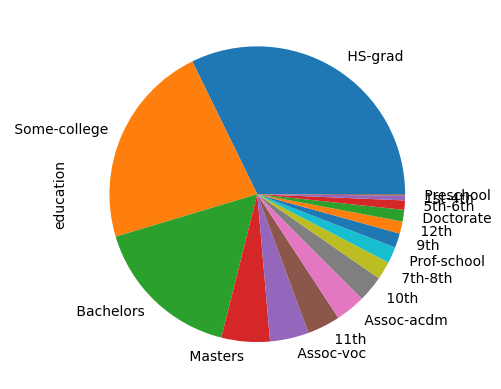

In [ ]:
data["education"].value_counts().plot(kind="pie")

<Axes: ylabel='marital_status'>

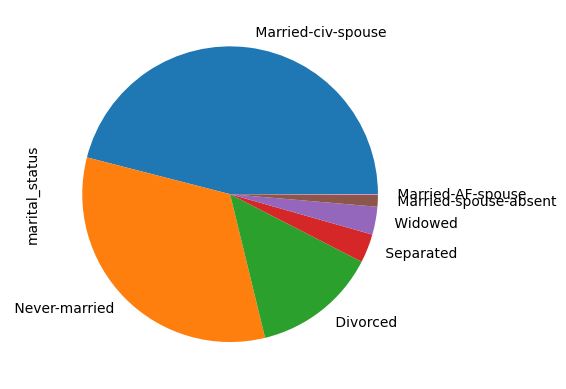

In [ ]:
data["marital_status"].value_counts().plot(kind="pie")

<Axes: ylabel='occupation'>

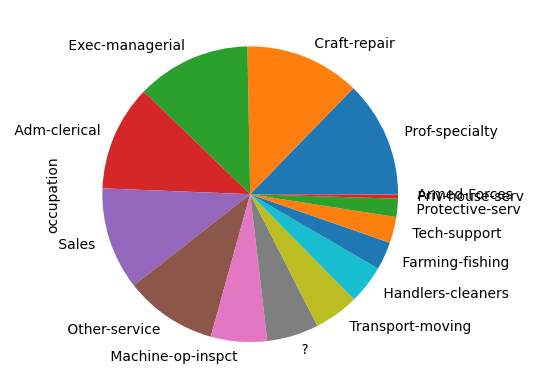

In [ ]:
data["occupation"].value_counts().plot(kind="pie")

In [ ]:
data["occupation"].unique()[-4]

' ?'

In [ ]:
data["occupation"]=data["occupation"].replace({data["occupation"].unique()[-4]:data["occupation"].mode()[0]}) #Replacing "?" with mode of the class.

<Axes: ylabel='relationship'>

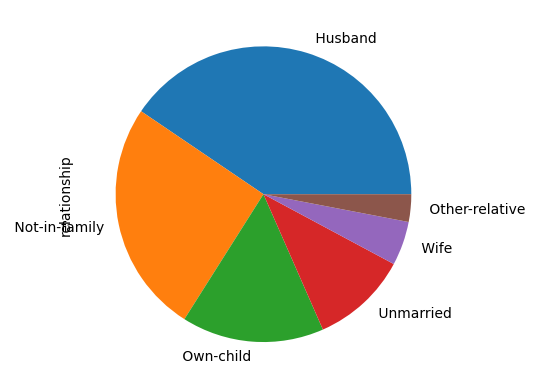

In [ ]:
data["relationship"].value_counts().plot(kind="pie")

<Axes: ylabel='race'>

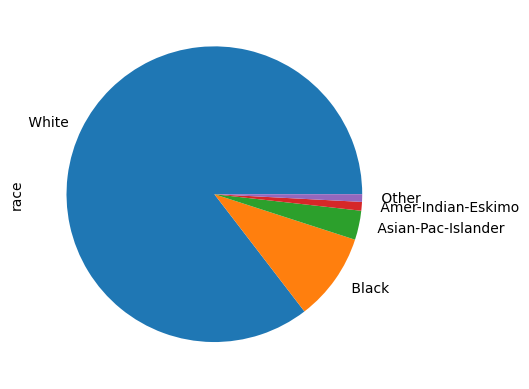

In [ ]:
data["race"].value_counts().plot(kind="pie")

<Axes: ylabel='sex'>

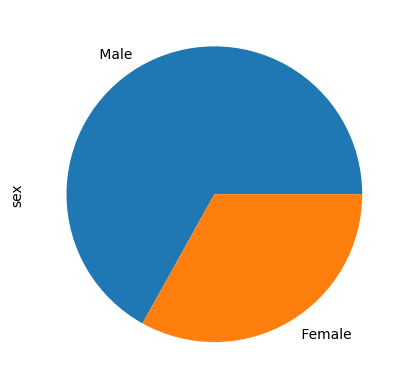

In [ ]:
data["sex"].value_counts().plot(kind="pie")

<Axes: >

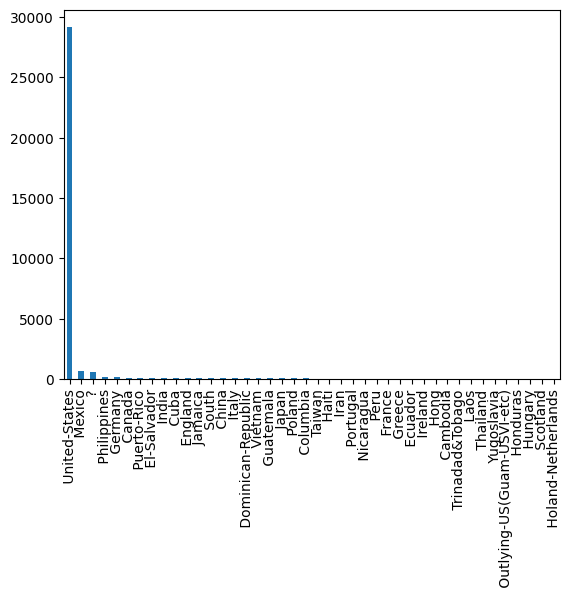

In [ ]:
data["native_country"].value_counts().plot(kind="bar")

In [ ]:
data["native_country"].unique()[4]

' ?'

In [ ]:
data["native_country"]=data["native_country"].replace({data["native_country"].unique()[4]:data["native_country"].mode()[0]})

<Axes: ylabel='income'>

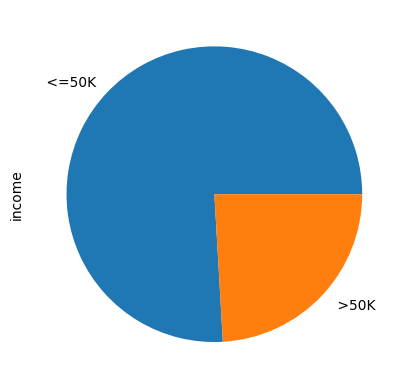

In [ ]:
data["income"].value_counts().plot(kind="pie")

### Stripplot

<Axes: xlabel='income', ylabel='age'>

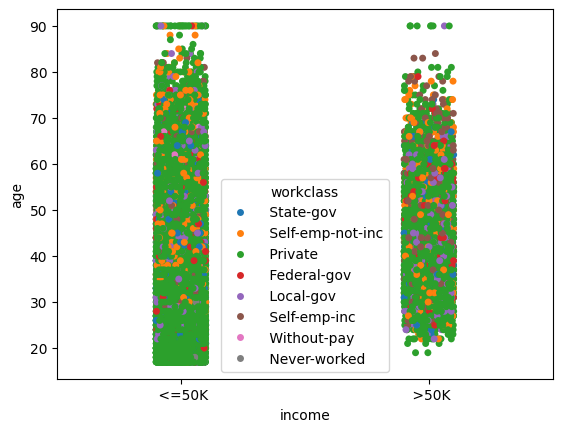

In [ ]:
sns.stripplot(x="income",y="age",hue="workclass",data=data)

<Axes: xlabel='income', ylabel='education_num'>

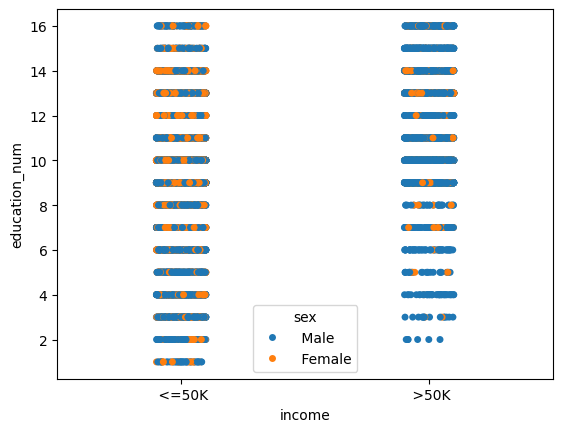

In [ ]:
sns.stripplot(x="income",y="education_num",hue="sex",data=data)

<Axes: xlabel='age', ylabel='Count'>

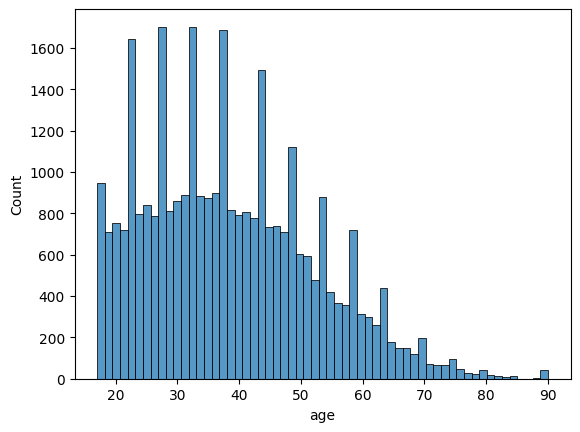

In [ ]:
sns.histplot(data["age"])

<Axes: xlabel='hours_per_week', ylabel='Count'>

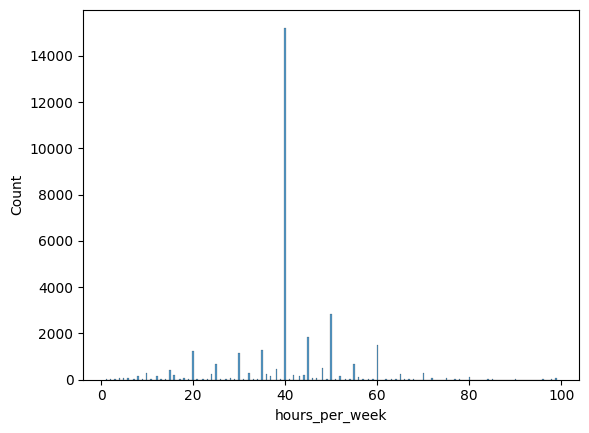

In [ ]:
sns.histplot(data["hours_per_week"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Detecting and Treating duplicates

In [ ]:
data[data.duplicated(keep=False)].count()

,0
age,47
workclass,47
fnlwgt,47
education,47
education_num,47
marital_status,47
occupation,47
relationship,47
race,47
sex,47


In [ ]:
data[data.duplicated(keep="first")].count()

,0
age,24
workclass,24
fnlwgt,24
education,24
education_num,24
marital_status,24
occupation,24
relationship,24
race,24
sex,24


In [ ]:
data.drop_duplicates(keep="first",inplace=True)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           32537 non-null  int64 
 1   age             32537 non-null  int64 
 2   workclass       32537 non-null  object
 3   fnlwgt          32537 non-null  int64 
 4   education       32537 non-null  object
 5   education_num   32537 non-null  int64 
 6   marital_status  32537 non-null  object
 7   occupation      32537 non-null  object
 8   relationship    32537 non-null  object
 9   race            32537 non-null  object
 10  sex             32537 non-null  object
 11  capital_gain    32537 non-null  int64 
 12  capital_loss    32537 non-null  int64 
 13  hours_per_week  32537 non-null  int64 
 14  native_country  32537 non-null  object
 15  income          32537 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [ ]:
data

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Checking for Missing Values

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.drop(["index"],axis=1,inplace=True)

In [ ]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Detecting Anamolies and Treating with Percentile method

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf14333baf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf143368070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf14333b850>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf1433685b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf143368850>],
 'means': []}

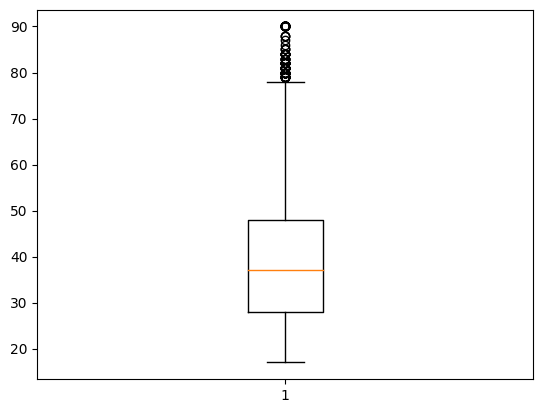

In [ ]:
plt.boxplot(data["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf1433afdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf1433e0370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf1433afb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf1433e0850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf1433e0af0>],
 'means': []}

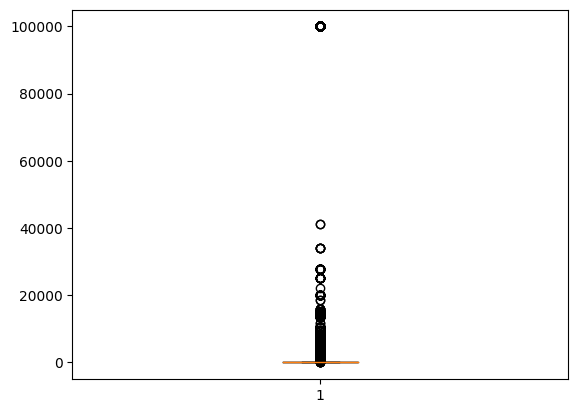

In [ ]:
plt.boxplot(data["capital_gain"])

In [ ]:
a=np.percentile(data.capital_gain,[99])[0]
a

15024.0

In [ ]:
data.capital_gain[(data.capital_gain>3*a)].count()

159

In [ ]:
data.capital_gain[(data.capital_gain>3*a)]=3*a

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf143232cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf1432331f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf143232a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf143233730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf1432339d0>],
 'means': []}

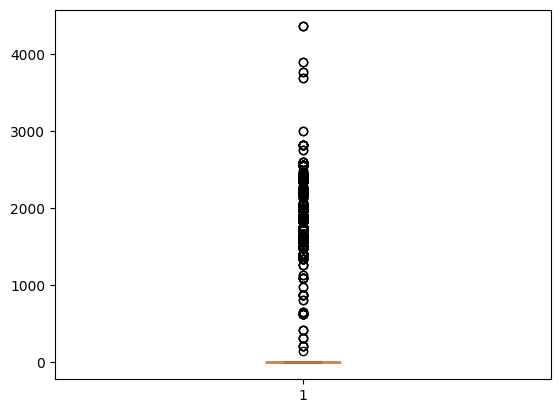

In [ ]:
plt.boxplot(data["capital_loss"])

In [ ]:
a=np.percentile(data.capital_loss,[99])[0]
a

1980.0

In [ ]:
data.capital_loss[(data.capital_loss>3*a)].count()

0

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Standardization using StandardScaler

**When to use StandardScaler :-**

It makes features comparable by centering them around 0 and scaling to unit variance, which is critical for many machine learning models to converge correctly.


Standardization is preferred when the algorithm assumes the input data follows a normal distribution or when the data has a wide range of values.

**When to use MinMaxScaler :-**

 It preserves the relationship between the minimum and maximum values, ensuring that no data points are outliers within the defined range.

Min-Max scaling works well when the data has a known minimum and maximum and no extreme outliers.

In [ ]:
data[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]]=StandardScaler().fit_transform(data[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]])

In [ ]:
data=pd.get_dummies(data,columns=["income","sex"],dtype=int)

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income_ <=50K,income_ >50K,sex_ Female,sex_ Male
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,0.339426,-0.216743,-0.035664,United-States,1,0,0,1
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,-0.201577,-0.216743,-2.222483,United-States,1,0,0,1
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,-0.201577,-0.216743,-0.035664,United-States,1,0,0,1
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,-0.201577,-0.216743,-0.035664,United-States,1,0,0,1
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,-0.201577,-0.216743,-0.035664,Cuba,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,Private,0.639678,Assoc-acdm,0.745913,Married-civ-spouse,Tech-support,Wife,White,-0.201577,-0.216743,-0.197650,United-States,1,0,1,0
32533,0.103716,Private,-0.335436,HS-grad,-0.420679,Married-civ-spouse,Machine-op-inspct,Husband,White,-0.201577,-0.216743,-0.035664,United-States,0,1,0,1
32534,1.423579,Private,-0.358779,HS-grad,-0.420679,Widowed,Adm-clerical,Unmarried,White,-0.201577,-0.216743,-0.035664,United-States,1,0,1,0
32535,-1.216148,Private,0.110930,HS-grad,-0.420679,Never-married,Adm-clerical,Own-child,White,-0.201577,-0.216743,-1.655530,United-States,1,0,0,1


## LabelEncoding

In [ ]:
le=LabelEncoder()
def encoding(df):
  for col in df.columns:
    if df[col].dtype==object:
      df[col]=le.fit_transform(df[col])
  return df

**LabelEncoding :-**

**Pros:**

Simple and fast:

Memory-efficient:

Useful for ordinal data:

**Cons:**

Implied ordinal relationship:

Not suitable for distance-based algorithms:

Bias risk:

**One Hot Encoding :-**

**Pros:**

No ordinal relationships:

Widely compatible with algorithms:

Handles multi-class variables:

**Cons:**

Increased dimensionality:

Sparsity:

Less efficient for high-cardinality features:

In [ ]:
encoding(data)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income_ <=50K,income_ >50K,sex_ Female,sex_ Male
0,0.030390,6,-1.063569,9,1.134777,4,0,1,4,0.339426,-0.216743,-0.035664,38,1,0,0,1
1,0.836973,5,-1.008668,9,1.134777,2,3,0,4,-0.201577,-0.216743,-2.222483,38,1,0,0,1
2,-0.042936,3,0.245040,11,-0.420679,0,5,1,4,-0.201577,-0.216743,-0.035664,38,1,0,0,1
3,1.056950,3,0.425752,1,-1.198407,2,5,0,2,-0.201577,-0.216743,-0.035664,38,1,0,0,1
4,-0.776193,3,1.408066,9,1.134777,2,9,5,2,-0.201577,-0.216743,-0.035664,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,3,0.639678,7,0.745913,2,12,5,4,-0.201577,-0.216743,-0.197650,38,1,0,1,0
32533,0.103716,3,-0.335436,11,-0.420679,2,6,0,4,-0.201577,-0.216743,-0.035664,38,0,1,0,1
32534,1.423579,3,-0.358779,11,-0.420679,6,0,4,4,-0.201577,-0.216743,-0.035664,38,1,0,1,0
32535,-1.216148,3,0.110930,11,-0.420679,4,0,3,4,-0.201577,-0.216743,-1.655530,38,1,0,0,1


# Feature Engineering

**Income per Hour:**

This feature could provide insight into how efficiently an individual generates income relative to their working hours. It might highlight individuals who, despite working fewer hours, earn a high income, and vice versa.


**Capital Change:**

The difference between capital_gain and capital_loss might give a clearer indication of overall financial movement, which could be predictive of income level.

In [ ]:
data["Income_per_hour"]=data["capital_gain"]/data["hours_per_week"]

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income_ <=50K,income_ >50K,sex_ Female,sex_ Male,Income_per_hour
0,0.030390,6,-1.063569,9,1.134777,4,0,1,4,0.339426,-0.216743,-0.035664,38,1,0,0,1,-9.517405
1,0.836973,5,-1.008668,9,1.134777,2,3,0,4,-0.201577,-0.216743,-2.222483,38,1,0,0,1,0.090699
2,-0.042936,3,0.245040,11,-0.420679,0,5,1,4,-0.201577,-0.216743,-0.035664,38,1,0,0,1,5.652160
3,1.056950,3,0.425752,1,-1.198407,2,5,0,2,-0.201577,-0.216743,-0.035664,38,1,0,0,1,5.652160
4,-0.776193,3,1.408066,9,1.134777,2,9,5,2,-0.201577,-0.216743,-0.035664,4,1,0,1,0,5.652160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,3,0.639678,7,0.745913,2,12,5,4,-0.201577,-0.216743,-0.197650,38,1,0,1,0,1.019867
32533,0.103716,3,-0.335436,11,-0.420679,2,6,0,4,-0.201577,-0.216743,-0.035664,38,0,1,0,1,5.652160
32534,1.423579,3,-0.358779,11,-0.420679,6,0,4,4,-0.201577,-0.216743,-0.035664,38,1,0,1,0,5.652160
32535,-1.216148,3,0.110930,11,-0.420679,4,0,3,4,-0.201577,-0.216743,-1.655530,38,1,0,0,1,0.121760


In [ ]:
data["Capital_change"]=data["capital_gain"]-data["capital_loss"]

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income_ <=50K,income_ >50K,sex_ Female,sex_ Male,Income_per_hour,Capital_change
0,0.030390,6,-1.063569,9,1.134777,4,0,1,4,0.339426,-0.216743,-0.035664,38,1,0,0,1,-9.517405,0.556169
1,0.836973,5,-1.008668,9,1.134777,2,3,0,4,-0.201577,-0.216743,-2.222483,38,1,0,0,1,0.090699,0.015166
2,-0.042936,3,0.245040,11,-0.420679,0,5,1,4,-0.201577,-0.216743,-0.035664,38,1,0,0,1,5.652160,0.015166
3,1.056950,3,0.425752,1,-1.198407,2,5,0,2,-0.201577,-0.216743,-0.035664,38,1,0,0,1,5.652160,0.015166
4,-0.776193,3,1.408066,9,1.134777,2,9,5,2,-0.201577,-0.216743,-0.035664,4,1,0,1,0,5.652160,0.015166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,3,0.639678,7,0.745913,2,12,5,4,-0.201577,-0.216743,-0.197650,38,1,0,1,0,1.019867,0.015166
32533,0.103716,3,-0.335436,11,-0.420679,2,6,0,4,-0.201577,-0.216743,-0.035664,38,0,1,0,1,5.652160,0.015166
32534,1.423579,3,-0.358779,11,-0.420679,6,0,4,4,-0.201577,-0.216743,-0.035664,38,1,0,1,0,5.652160,0.015166
32535,-1.216148,3,0.110930,11,-0.420679,4,0,3,4,-0.201577,-0.216743,-1.655530,38,1,0,0,1,0.121760,0.015166


### Log Transformation

(array([5562., 5884., 6046., 6158., 3965., 2591., 1595.,  496.,  174.,
          66.]),
 array([-1.58277655, -1.04749857, -0.5122206 ,  0.02305737,  0.55833535,
         1.09361332,  1.62889129,  2.16416927,  2.69944724,  3.23472521,
         3.77000319]),
 <BarContainer object of 10 artists>)

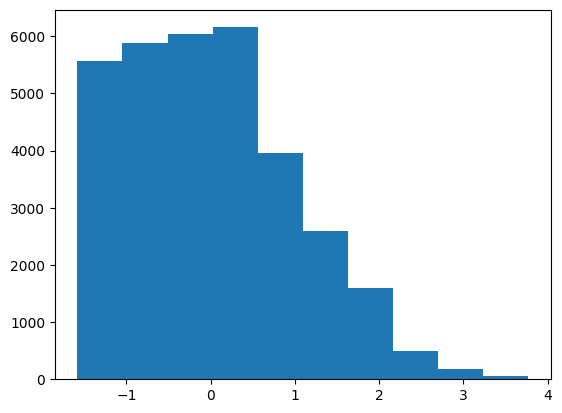

In [ ]:
plt.hist(data["age"])

Age column is highly positively skewed.Log transformation helps reduce the skewness of data, making the distribution more normal.ML Algorithms works better when the feature follows normal distribution.

In [ ]:
data["age"]=np.log(data["age"]+1)

(array([ 838.,    0.,    0.,    0.,  785., 1700., 3389., 6827., 9714.,
        3722.]),
 array([-5.56503395, -4.85229586, -4.13955777, -3.42681968, -2.71408158,
        -2.00134349, -1.2886054 , -0.57586731,  0.13687079,  0.84960888,
         1.56234697]),
 <BarContainer object of 10 artists>)

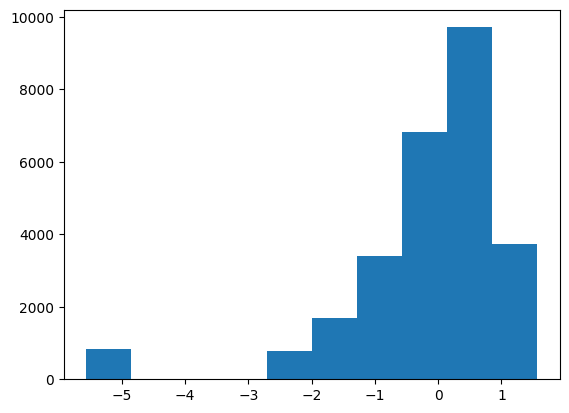

In [ ]:
plt.hist(data["age"])

In [ ]:
data.isnull().sum()

,0
age,5562
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
capital_gain,0


In [ ]:
data["age"]=data["age"].fillna(data["age"].mean())

## Isolation Forest

Outliers can significantly affect model performance, especially in algorithms that are sensitive to the range of values, such as linear regression, decision trees, and clustering algorithms.

The Isolation Forest algorithm is an effective way to detect outliers, particularly in high-dimensional datasets. It works by randomly selecting a feature and splitting data at random points.

In [ ]:
clf=IsolationForest(random_state=42,contamination=0.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=42)

In [ ]:
y_pred_outliers = clf.predict(data)
y_pred_outliers

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
data['scores']=clf.decision_function(data)

In [ ]:
data['anomaly']=clf.predict(data.iloc[:,0:-1])

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,hours_per_week,native_country,income_ <=50K,income_ >50K,sex_ Female,sex_ Male,Income_per_hour,Capital_change,scores,anomaly
0,0.029937,6,-1.063569,9,1.134777,4,0,1,4,0.339426,...,-0.035664,38,1,0,0,1,-9.517405,0.556169,0.115619,1
1,0.608119,5,-1.008668,9,1.134777,2,3,0,4,-0.201577,...,-2.222483,38,1,0,0,1,0.090699,0.015166,0.179424,1
2,-0.043885,3,0.245040,11,-0.420679,0,5,1,4,-0.201577,...,-0.035664,38,1,0,0,1,5.652160,0.015166,0.211319,1
3,0.721225,3,0.425752,1,-1.198407,2,5,0,2,-0.201577,...,-0.035664,38,1,0,0,1,5.652160,0.015166,0.163919,1
4,-1.496973,3,1.408066,9,1.134777,2,9,5,2,-0.201577,...,-0.035664,4,1,0,1,0,5.652160,0.015166,0.046737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-1.893919,3,0.639678,7,0.745913,2,12,5,4,-0.201577,...,-0.197650,38,1,0,1,0,1.019867,0.015166,0.127603,1
32533,0.098682,3,-0.335436,11,-0.420679,2,6,0,4,-0.201577,...,-0.035664,38,0,1,0,1,5.652160,0.015166,0.182651,1
32534,0.885245,3,-0.358779,11,-0.420679,6,0,4,4,-0.201577,...,-0.035664,38,1,0,1,0,5.652160,0.015166,0.151180,1
32535,-0.201549,3,0.110930,11,-0.420679,4,0,3,4,-0.201577,...,-1.655530,38,1,0,0,1,0.121760,0.015166,0.188498,1


In [ ]:
data[data["anomaly"]==-1]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,hours_per_week,native_country,income_ <=50K,income_ >50K,sex_ Female,sex_ Male,Income_per_hour,Capital_change,scores,anomaly
52,0.480570,3,-1.306864,14,1.912505,2,9,5,4,-0.201577,...,1.584202,15,0,1,1,0,-0.127242,-4.703317,-0.017621,-1
84,0.334340,3,1.457159,11,-0.420679,0,2,1,4,3.367950,...,-0.035664,38,0,1,1,0,-94.436264,3.584693,-0.012218,-1
106,-0.201549,3,1.090354,0,-1.587271,4,9,3,4,8.283018,...,-0.683610,38,1,0,1,0,-12.116581,8.499762,-0.012014,-1
112,0.822827,5,1.381501,11,-0.420679,2,7,0,4,-0.201577,...,0.774269,1,0,1,0,1,-0.260345,-4.666105,-0.004198,-1
157,1.216933,5,2.884208,15,-0.031815,5,11,4,2,-0.201577,...,-3.113409,38,1,0,0,1,0.064745,-4.489968,-0.000890,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32318,1.280042,5,0.088628,9,1.134777,6,2,1,4,3.737993,...,-2.627450,10,0,1,0,1,-1.422670,3.954736,-0.019907,-1
32347,0.721225,5,-0.494850,14,1.912505,4,9,1,1,6.723465,...,-0.035664,29,0,1,0,1,-188.523849,6.940209,-0.061151,-1
32401,-0.201549,3,-0.085357,3,-3.142726,2,6,5,0,-0.201577,...,-0.440630,25,1,0,1,0,0.457475,0.015166,-0.006938,-1
32494,0.854523,1,-0.751873,11,-0.420679,2,2,0,4,11.014663,...,-0.035664,38,0,1,0,1,-308.847662,11.231406,-0.029275,-1


In [ ]:
data.drop(data[data["anomaly"]==-1].index,inplace=True)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.drop(["index"],axis=1,inplace=True)

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,hours_per_week,native_country,income_ <=50K,income_ >50K,sex_ Female,sex_ Male,Income_per_hour,Capital_change,scores,anomaly
0,0.029937,6,-1.063569,9,1.134777,4,0,1,4,0.339426,...,-0.035664,38,1,0,0,1,-9.517405,0.556169,0.115619,1
1,0.608119,5,-1.008668,9,1.134777,2,3,0,4,-0.201577,...,-2.222483,38,1,0,0,1,0.090699,0.015166,0.179424,1
2,-0.043885,3,0.245040,11,-0.420679,0,5,1,4,-0.201577,...,-0.035664,38,1,0,0,1,5.652160,0.015166,0.211319,1
3,0.721225,3,0.425752,1,-1.198407,2,5,0,2,-0.201577,...,-0.035664,38,1,0,0,1,5.652160,0.015166,0.163919,1
4,-1.496973,3,1.408066,9,1.134777,2,9,5,2,-0.201577,...,-0.035664,4,1,0,1,0,5.652160,0.015166,0.046737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32206,-0.201549,3,1.140366,15,-0.031815,4,10,1,4,-0.201577,...,-0.035664,38,1,0,0,1,5.652160,0.015166,0.200795,1
32207,-1.893919,3,0.639678,7,0.745913,2,12,5,4,-0.201577,...,-0.197650,38,1,0,1,0,1.019867,0.015166,0.127603,1
32208,0.098682,3,-0.335436,11,-0.420679,2,6,0,4,-0.201577,...,-0.035664,38,0,1,0,1,5.652160,0.015166,0.182651,1
32209,0.885245,3,-0.358779,11,-0.420679,6,0,4,4,-0.201577,...,-0.035664,38,1,0,1,0,5.652160,0.015166,0.151180,1


## Predictive Power Score

 PPS evaluate the predictive relationship between variables. It helps determine how well one feature can predict another, regardless of the type of relationship (linear or non-linear).

### Comparison with Correlation Matrix:


**Correlation Matrix:**

Measures linear relationships.

Symmetric: The correlation between X and Y is the same as between Y and X.

Values range from -1 (perfect negative correlation) to 1 (perfect positive correlation).

**PPS Matrix:**

Measures predictive power in both linear and non-linear cases.

Asymmetric: The relationship between X and Y may differ from Y and X.

Values ranges from 0 to 1, where 1 is perfect prediction.

In [ ]:
pps.matrix(data)["ppscore"]

,ppscore
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
436,0.0
437,0.0
438,0.0
439,0.0


In [ ]:
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.538000,0.611581,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,0.729773,0.742252,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.700200,2.878519,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,0.733009,0.763472,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
436,anomaly,sex_ Male,0.0,regression,True,mean absolute error,0.335000,0.445619,DecisionTreeRegressor()
437,anomaly,Income_per_hour,0.0,regression,True,mean absolute error,3.882915,3.927618,DecisionTreeRegressor()
438,anomaly,Capital_change,0.0,regression,True,mean absolute error,0.375764,0.421721,DecisionTreeRegressor()
439,anomaly,scores,0.0,regression,True,mean absolute error,0.037547,0.038408,DecisionTreeRegressor()
